# Drift_correction by cross correlation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
import os
import sys
from tqdm import tqdm
import tifffile
from skimage.registration import phase_cross_correlation
from skimage.morphology import disk
from skimage.filters import median

In [19]:
code_path = os.path.abspath('E:/code/HRTEM-grain-seg/utils/')

if code_path not in sys.path:
    sys.path.append(code_path)
    
from drift_corr import *

Num of Frames =  76
(60, 91, 374, 353)


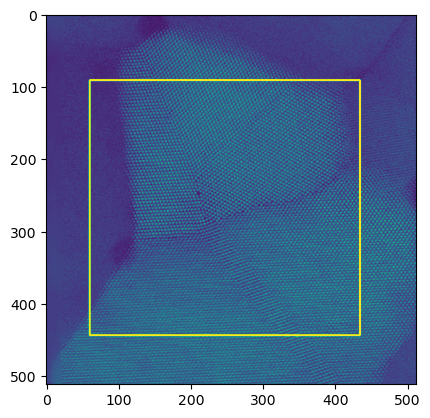

In [20]:
file_name = 'E:/code/HRTEM-grain-seg/data/Substack.avi'
cap = cv2.VideoCapture(file_name)
frames = int(cv2.VideoCapture.get(cap, int(cv2.CAP_PROP_FRAME_COUNT) ))
width=int(cv2.VideoCapture.get(cap, int(cv2.CAP_PROP_FRAME_WIDTH)))-1
height=int(cv2.VideoCapture.get(cap, int(cv2.CAP_PROP_FRAME_HEIGHT)))-1
print('Num of Frames = ', frames)
frame_number=1
cap.set(1, frame_number-1)
res, image = cap.read()
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

roi = select_ROI(img)
print(roi)
plt.figure()
plt.imshow(cv2.rectangle(img, (roi[0],roi[1]), (roi[0]+roi[2],roi[1]+roi[3]), (255, 0, 0), 2))

Num of Frames =  76 , width =  511 , height =  511


100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:05<00:00, 14.33it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Num of Frames =  76


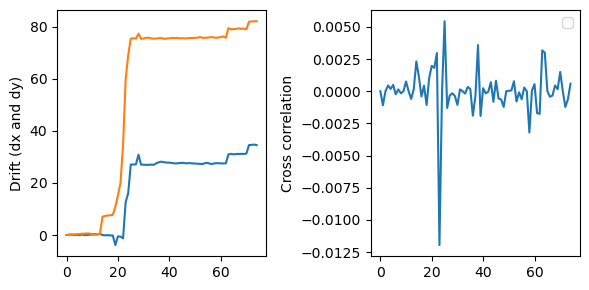

In [21]:
Range = (0,-1,1)
drift_list = drift_vectors_CC(file_name, roi, Range, overlap_ratio = 0.7)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(drift_list[:,1:3])
plt.ylabel('Drift (dx and dy)')
plt.subplot(1,2,2)
plt.plot(drift_list[:,3])
plt.ylabel('Cross correlation')
plt.legend()
plt.tight_layout()

drift_corr_tiff(file_name, 'E:/drift_corrected.tif', Range, drift_list)